<a href="https://colab.research.google.com/github/hftracker/data-science-bootcamp/blob/main/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 



### <a name='a2'></a> Import bibliotek

In [1]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x  

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf

# tu się coś pozmieniało musiałem usunąć tensorflow żeby zaimportować
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.9.2


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [6]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [16]:
print(X_train[0])
print(y_train[0])

[[0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.            ]
 [0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.            ]
 [0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.     

In [14]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [15]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a>  Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

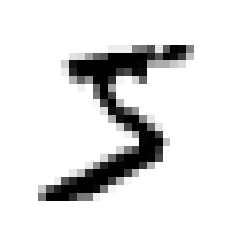

In [17]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

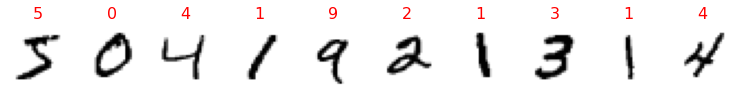

In [20]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='red', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a6'></a> Trenowanie modelu

In [22]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2940 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9767


### <a name='a7'></a> Ocena modelu

In [25]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0739 - accuracy: 0.9772 - 303ms/epoch - 968us/step


[0.0738963931798935, 0.9771999716758728]

In [29]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.293967,0.915100
1,0.143068,0.957800
2,0.107075,0.967150
3,0.089295,0.972217
4,0.076098,0.976733


In [28]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

### <a name='a8'></a> Predykcja na podstawie modelu

In [44]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[0.000000067991, 0.00000000215 , 0.000009070222, ..., 0.99980545    , 0.000001915014, 0.000009921832],
       [0.00000061035 , 0.0016772413  , 0.9982644     , ..., 0.000000000001, 0.000001255967, 0.            ],
       [0.000000291565, 0.9988659     , 0.0001504457  , ..., 0.0008427653  , 0.00008375082 , 0.000001978573],
       ...,
       [0.000000000001, 0.000000000135, 0.000000000006, ..., 0.000000257541, 0.000000167979, 0.000021445143],
       [0.000000000041, 0.000000003553, 0.000000000001, ..., 0.000000000032, 0.000050196926, 0.00000000338 ],
       [0.000000052636, 0.000000000001, 0.000001592291, ..., 0.000000000013, 0.000000007028, 0.000000000001]],
      dtype=float32)

In [ ]:
model.

In [51]:
# y_pred = model.predict_classes(X_test)
# twierdzi że obiekt model nie ma metody predict_classes - nie ma od wersji 2.6

# y_pred = model.predict(X_test)
# clas = np.argmax(y_pred,axis=1)

y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [ ]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([149, 151, 247, 321, 340, 381, 445, 448, 495, 582], dtype='int64')

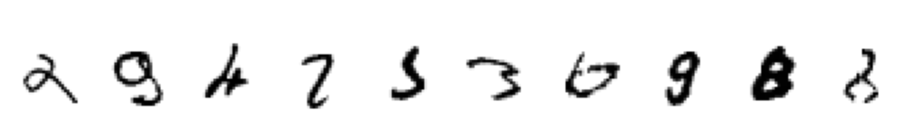

In [ ]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()